Code to make the plots of the parameter values and function as in the paper figure:

In [1]:
import utils_matchHill_repo as utils_matchHill
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("./bin")
import CG_c4_N6_samesitesFalse
import matplotlib.gridspec as gridspec

In [2]:


psfunc=CG_c4_N6_samesitesFalse.interfaceps_a_GRF_CG_c4_N6_samesitesFalse_x
GRFfunc=CG_c4_N6_samesitesFalse.interface_GRF_CG_c4_N6_samesitesFalse_x


In [3]:
f="./bin/CG_c4_N6_samesitesFalse.cpp"
fname="void GRF_CG_c4_N6_samesitesFalse_x"
fh=open(f,"r")
get=False
lines=[]
for l in fh.readlines():
    if fname in l:
        print(l)
        get=True
    if get:
        if l=="}\n":
            get=False
    if get:
        lines.append(l)
fh.close()

void GRF_CG_c4_N6_samesitesFalse_x(py::array_t<double> parsar, vector<long double> &num, vector<long double> &den){



In [4]:
write=True #only need to write once
if write:
    fh=open("./bin/effective_pars.py","w")
    fh.write("def get_parameter_values(pars):\n")
#K_defs=[]
#w_defs=[]
parameters_names=[]
for l in lines:
    if "T" in l and "pars" in l:
        l_=l.strip().replace("T ","")
        if write:
            fh.write("    "+l_+"\n")
for l in lines:
    if "T K" in l and not "pars" in l:
        l_=l.strip().replace("T ","")
        if write:
            fh.write("    "+l_+"\n")
        #K_defs.append(l_)
        parameters_names.append(l_.split("=")[0])
for l in lines:
    if "T w" in l:
        #print(l.strip().replace("T ",""))
        l_=l.strip().replace("T ", "")
        if write:
            fh.write("    "+l_+"\n")
        parameters_names.append(l_.split("=")[0])
        #w_defs.append(l_)
if write:
    fh.write("    return [%s]"%(",".join(parameters_names)))
    fh.close()



size_w=[]
for x in parameters_names[6:]:
    n_l=list(x[1:])
    dif=6-len(n_l)
    zeros=['0']*dif
    tuple_=tuple(map(int,zeros+n_l))
    size_w.append(tuple_)
    
size_w=np.array(size_w,dtype=[("fst","i4"),("se","i4"),("th","i4"),("fo","i4"),("fi","i4"),("si","i4")])

argsort_=np.argsort(size_w,order=["fst","se","th","fo","fi","si"])
argsort=[0,1,2,3,4,5]+list(argsort_+6)

parameters_names_tex=[]
for par in parameters_names:
    p_l=list(par)
    letter=p_l[0]
    numbers=p_l[1:]
    if letter=="K":
        newlab="$K^\emptyset"
    else:
        newlab="$\omega^\emptyset"
    site=numbers[0]
    newlab+=site
    
    if letter!="K" and len(numbers)>1:
        if len(numbers)>2:
            newlab+=",\{%s\}$"%",".join(numbers[1:])
        else:
            newlab+=",\{%s\}$"%(numbers[1])
    else:
        newlab+=",\emptyset$"
    parameters_names_tex.append(newlab)
        

In [5]:
from effective_pars import get_parameter_values as gpv
import matplotlib as mpl
fontsize=14
mpl.rcParams["font.size"]=fontsize
import matplotlib.pyplot as plt

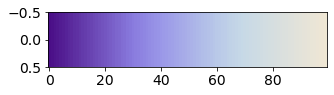

In [6]:

#colormap to match that in another figure done with Mathematica
#List @@@ ColorData["LakeColors"] /@ Subdivide[10] in mathematica
from matplotlib.colors import LinearSegmentedColormap
colors=[(0.293416, 0.0574044, 0.529412), 
        (0.374538, 0.198453, 0.643438),
        (0.455659, 0.339501, 0.757464), 
        (0.536781, 0.480549, 0.87149),
        (0.603583, 0.591452, 0.910405),
        (0.663226, 0.687282, 0.911765),
        (0.722869, 0.783111, 0.913125),
        (0.780485, 0.852952, 0.906032),
        (0.834049, 0.870814, 0.882036),
        (0.887613, 0.888676, 0.858039),
        (0.941176, 0.906538, 0.834043)]


newcmp = LinearSegmentedColormap.from_list('LakeColors', colors, N=256)
ar=np.arange(100)
fig,ax=plt.subplots(1,1,figsize=(5,1))
ax.imshow(ar.reshape(1,100),cmap=newcmp,aspect="auto")
plt.show()

In [7]:
#seeds (can be obtained when opening the .out). From analyse_search_cluster notebook inside clustersearch
#846
parset4_1=np.array([0.5660199559663581,0.00012247332173641594,2.0489953485379804,0.29035908075932804,0.0006750348250358079,0.00010494917519744709,0.00010180012488827794,0.0001291038548608444,0.00012579630291789523,0.00013832190404985167,0.00014180449111569034,0.0003173895113150346,0.07933530604697121,0.04943344202449342,0.5356691097292218,3.391745852269456,0.0001351121425053076,0.00010852238201396845,1.6358422726332045,0.5154300063141086,0.9518556485351912,1.351899962688252,1.9644875641395123,0.3894940472266722,246462.45475289153,0.00014120518853128654,1.0902245807094318e-06])
#5058
parset4_2=np.array([0.1543926972886115,24.958955503361803,0.0009561913822446309,0.899126445579961,0.0008415214049494133,0.000383585019371258,0.02380888364377265,0.00010478362249223665,0.22436036849760574,0.00010806962319450572,0.00022091646922369276,0.00015708792540126826,0.8027465935223609,3.3085176716505194,3.572678934646394,1.5935697469771433,66.66843778896181,1.4351955145932314,0.00023079552333288425,0.00011476889511683448,0.00010638302718757042,0.00010450327741575775,0.00015035172689158182,0.00011417576709554034,3.852210905594874e-06,1.577510142759879e-06,28700.29366048038])

#416
parset5_1=np.array([0.00022761259400879425,0.00026975273648903073,0.0003008941477118364,0.7455788640026711,1.7533570643098628,150.14713701222107,7.546810840975103,15.487148342448608,5.391648411246393,24.318113436509165,6.357977959541313,8.435183738156207,0.08214068712428864,0.028054252496060895,0.00012740593558962824,773.7486127642941,0.8319779049880267,0.052536081659923926,0.00012916535672313997,0.0003112911060389804,0.00037791108364239144,0.00012565771066895087,0.00013919776915489028,0.0002777922399034988,1e-06,3.67333850470415e-05,886873.2857952606])
#4358
parset5_2=np.array([190.24736667674713,0.00020214654825503908,0.004099487331822161,0.0011902974834010521,34.31752244484248,770.3887265125334,0.0005235441264116931,0.0032863749315963763,0.0008310277794976933,0.0033941485981931587,0.006805825766733705,0.010683613260873583,188.76534541904408,174.7793511852531,392.43468508108066,202.5756221460934,271.1906014518266,131.04564221775334,6.567902346895758,0.00012940197106452977,5.916187397375098,0.00016584341025401977,0.20894095733100132,0.005294990963176832,881116.4410890675,5.323360812340966e-06,0.0036199377456514466])

#4819
parset6_1=np.array([0.0001,0.17676420032226386,0.00013061508157304996,126.19599673345168,2.6831927379236853,0.17108725131510708,0.009109854487003261,101.22845748486738,0.00024367846679445058,0.000136399420438803,0.00033424821672321456,0.007491056536373135,123.29558400528428,78.30804897393767,68.05790758791564,44.48620341481694,45.47934807548229,77.10783046456159,0.00019119076026616788,0.00020943796840954814,0.0037949997882580078,0.01045553286747052,0.00010975623061682247,0.0001018330682777418,0.3981149858778752,1.813928850965743e-06,529940.1856542875])
#372
parset6_2=np.array([0.00010462780935794624,0.0009998062764633262,0.0001855966737190295,0.00025668702704467804,0.00810950102745131,0.0001,0.0001,0.0001413090800281306,0.00010683763655335023,0.00010259164568557102,0.00010206699556591091,0.0001412350433945252,7.671091517201881,6.385013216403183,8.049221849810229,5.39831371383444,8.639655083117262,7.25918883980562,0.03694801666662621,8.27402661200493,0.00018973727087735393,3.2157254217823374,0.03706297995237256,0.00015066182934890513,78165.02491837055,1.0986272750964841e-06,1.1103746601037573e-06])

In [8]:
allpars=np.vstack([parset4_1,parset4_2,parset5_1,parset5_2,parset6_1,parset6_2])
np.min(allpars[:,:-3]),np.max(allpars[:,:-3]), np.min(allpars[:,:]),np.max(allpars[:,:])

(0.0001, 773.7486127642941, 1e-06, 886873.2857952606)

In [9]:
#print parameter values 

for parset in allpars:
    for p,par in enumerate(parset):
        if p<24:
            site=(p%6)+1
            conformation=(p//6)+1
            print(r"$K_{%d,%d,\emptyset}=%g$"%(conformation,site,par),end=",")
        else:
            print(r"$l_%d=%g$"%((p-24)+2,par),end=",")
    print("")
        
    print(parset)

$K_{1,1,\emptyset}=0.56602$,$K_{1,2,\emptyset}=0.000122473$,$K_{1,3,\emptyset}=2.049$,$K_{1,4,\emptyset}=0.290359$,$K_{1,5,\emptyset}=0.000675035$,$K_{1,6,\emptyset}=0.000104949$,$K_{2,1,\emptyset}=0.0001018$,$K_{2,2,\emptyset}=0.000129104$,$K_{2,3,\emptyset}=0.000125796$,$K_{2,4,\emptyset}=0.000138322$,$K_{2,5,\emptyset}=0.000141804$,$K_{2,6,\emptyset}=0.00031739$,$K_{3,1,\emptyset}=0.0793353$,$K_{3,2,\emptyset}=0.0494334$,$K_{3,3,\emptyset}=0.535669$,$K_{3,4,\emptyset}=3.39175$,$K_{3,5,\emptyset}=0.000135112$,$K_{3,6,\emptyset}=0.000108522$,$K_{4,1,\emptyset}=1.63584$,$K_{4,2,\emptyset}=0.51543$,$K_{4,3,\emptyset}=0.951856$,$K_{4,4,\emptyset}=1.3519$,$K_{4,5,\emptyset}=1.96449$,$K_{4,6,\emptyset}=0.389494$,$l_2=246462$,$l_3=0.000141205$,$l_4=1.09022e-06$,
[5.66019956e-01 1.22473322e-04 2.04899535e+00 2.90359081e-01
 6.75034825e-04 1.04949175e-04 1.01800125e-04 1.29103855e-04
 1.25796303e-04 1.38321904e-04 1.41804491e-04 3.17389511e-04
 7.93353060e-02 4.94334420e-02 5.35669110e-01 3.3

In [10]:
#print parameter values in table format
for p in range(27):
    for ps,parset in enumerate(allpars):
        par=parset[p]
        #if par <0.0001 or par>10000:
        if True:
            stringv=np.format_float_scientific(par)
            base,exp=stringv.split("e")
            #if int(exp)==0:
            #    number=r"$%2.3f$"%(par)
                 
            if int(exp)==1:
                number=r"$%2.3f \times 10$"%(float(base))
            else:

                number=r"$%2.3f \times 10^{%d}$"%(float(base),int(exp))
            
        else:
            number=r"$%2.6f$"%par
        if p<24:
            site=(p%6)+1
            conformation=(p//6)+1
            if ps==0:
                print(r"$K_{%d,%d,\emptyset}$"%(conformation,site),end=" ")
            
            print(r"& %s"%number,end=" ")
        else:
            if ps==0:
                print(r"$l_%d$"%((p-24)+2),end=" ")
            print(r"& %s"%number,end=" ")
    print("\\\\")
    if (p+1)%6==0 and p>0:
        print("\hline")
        
   
            
   

$K_{1,1,\emptyset}$ & $5.660 \times 10^{-1}$ & $1.544 \times 10^{-1}$ & $2.276 \times 10^{-4}$ & $1.902 \times 10^{2}$ & $1.000 \times 10^{-4}$ & $1.046 \times 10^{-4}$ \\
$K_{1,2,\emptyset}$ & $1.225 \times 10^{-4}$ & $2.496 \times 10$ & $2.698 \times 10^{-4}$ & $2.021 \times 10^{-4}$ & $1.768 \times 10^{-1}$ & $9.998 \times 10^{-4}$ \\
$K_{1,3,\emptyset}$ & $2.049 \times 10^{0}$ & $9.562 \times 10^{-4}$ & $3.009 \times 10^{-4}$ & $4.099 \times 10^{-3}$ & $1.306 \times 10^{-4}$ & $1.856 \times 10^{-4}$ \\
$K_{1,4,\emptyset}$ & $2.904 \times 10^{-1}$ & $8.991 \times 10^{-1}$ & $7.456 \times 10^{-1}$ & $1.190 \times 10^{-3}$ & $1.262 \times 10^{2}$ & $2.567 \times 10^{-4}$ \\
$K_{1,5,\emptyset}$ & $6.750 \times 10^{-4}$ & $8.415 \times 10^{-4}$ & $1.753 \times 10^{0}$ & $3.432 \times 10$ & $2.683 \times 10^{0}$ & $8.110 \times 10^{-3}$ \\
$K_{1,6,\emptyset}$ & $1.049 \times 10^{-4}$ & $3.836 \times 10^{-4}$ & $1.501 \times 10^{2}$ & $7.704 \times 10^{2}$ & $1.711 \times 10^{-1}$ & $1.00

In [11]:
yticklabels=["$K_{c_k,%d,\emptyset}$"%(i+1) for i in range(6)]
xticklabels=["$c_%d$"%(i+1) for i in range(4)]
sizetex=18
minp=-4
maxp=3 #even though I allowed parameters to go from 10^-4 to 10^4, as can be seen above the max value is 773

list_pars=[[4,parset4_1],[4,parset4_2],[5,parset5_1],[5,parset5_2],[6,parset6_1],[6,parset6_2]]
colors=["deepskyblue","deepskyblue","dodgerblue","dodgerblue","navy","navy"]

yticklabels=["$K_{c_k,%d,\emptyset}$"%(i+1) for i in range(6)]
xticklabels=["$c_%d$"%(i+1) for i in range(4)]
sizetex=18
minp=-4
maxp=3 #even though I allowed parameters to go from 10^-4 to 10^4, as can be seen above the max value is 773

In [12]:
if not os.path.isdir("plots"):
    os.mkdir("plots")

In [13]:
for i in range(len(argsort)):
    print(i,np.array(parameters_names_tex)[argsort][i])

0 $K^\emptyset1,\emptyset$
1 $K^\emptyset2,\emptyset$
2 $K^\emptyset3,\emptyset$
3 $K^\emptyset4,\emptyset$
4 $K^\emptyset5,\emptyset$
5 $K^\emptyset6,\emptyset$
6 $\omega^\emptyset1,\{2\}$
7 $\omega^\emptyset1,\{3\}$
8 $\omega^\emptyset1,\{4\}$
9 $\omega^\emptyset1,\{5\}$
10 $\omega^\emptyset1,\{6\}$
11 $\omega^\emptyset2,\{3\}$
12 $\omega^\emptyset2,\{4\}$
13 $\omega^\emptyset2,\{5\}$
14 $\omega^\emptyset2,\{6\}$
15 $\omega^\emptyset3,\{4\}$
16 $\omega^\emptyset3,\{5\}$
17 $\omega^\emptyset3,\{6\}$
18 $\omega^\emptyset4,\{5\}$
19 $\omega^\emptyset4,\{6\}$
20 $\omega^\emptyset5,\{6\}$
21 $\omega^\emptyset1,\{2,3\}$
22 $\omega^\emptyset1,\{2,4\}$
23 $\omega^\emptyset1,\{2,5\}$
24 $\omega^\emptyset1,\{2,6\}$
25 $\omega^\emptyset1,\{3,4\}$
26 $\omega^\emptyset1,\{3,5\}$
27 $\omega^\emptyset1,\{3,6\}$
28 $\omega^\emptyset1,\{4,5\}$
29 $\omega^\emptyset1,\{4,6\}$
30 $\omega^\emptyset1,\{5,6\}$
31 $\omega^\emptyset2,\{3,4\}$
32 $\omega^\emptyset2,\{3,5\}$
33 $\omega^\emptyset2,\{3,6\}$
34 $

affinities at conformation 1 : [5.66019956e-01 1.22473322e-04 2.04899535e+00 2.90359081e-01
 6.75034825e-04 1.04949175e-04]
affinities at conformation 2 : [0.0001018  0.0001291  0.0001258  0.00013832 0.0001418  0.00031739]
affinities at conformation 3 : [7.93353060e-02 4.94334420e-02 5.35669110e-01 3.39174585e+00
 1.35112143e-04 1.08522382e-04]
affinities at conformation 4 : [1.63584227 0.51543001 0.95185565 1.35189996 1.96448756 0.38949405]
[1.00000000e+00 2.46462455e+05 1.41205189e-04 1.09022458e-06]
conformation parameters [2.46462455e+05 1.41205189e-04 1.09022458e-06]
conformation probabilities
[4.05739667e-06 9.99995942e-01 5.72925461e-10 4.42347358e-12]
0.902481786117355 1.1003420193275482
xhalf 80.36885548453044


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: Use the colorbar set_ticks() method instead.


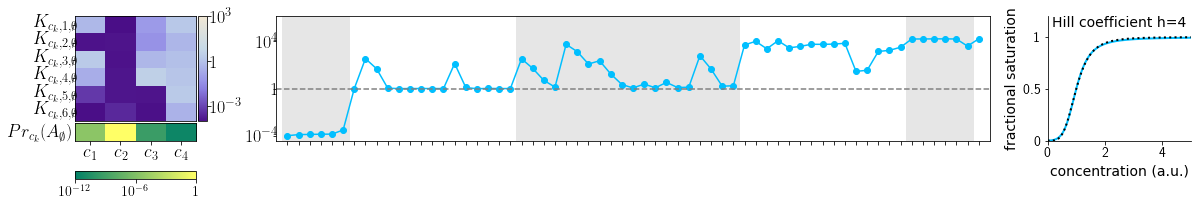

affinities at conformation 1 : [1.54392697e-01 2.49589555e+01 9.56191382e-04 8.99126446e-01
 8.41521405e-04 3.83585019e-04]
affinities at conformation 2 : [2.38088836e-02 1.04783622e-04 2.24360368e-01 1.08069623e-04
 2.20916469e-04 1.57087925e-04]
affinities at conformation 3 : [ 0.80274659  3.30851767  3.57267893  1.59356975 66.66843779  1.43519551]
affinities at conformation 4 : [0.0002308  0.00011477 0.00010638 0.0001045  0.00015035 0.00011418]
[1.00000000e+00 3.85221091e-06 1.57751014e-06 2.87002937e+04]
conformation parameters [3.85221091e-06 1.57751014e-06 2.87002937e+04]
conformation probabilities
[3.48416351e-05 1.34217327e-10 5.49630327e-11 9.99965158e-01]
0.9108974874022608 1.1494191832262048
xhalf 15.10808538356139


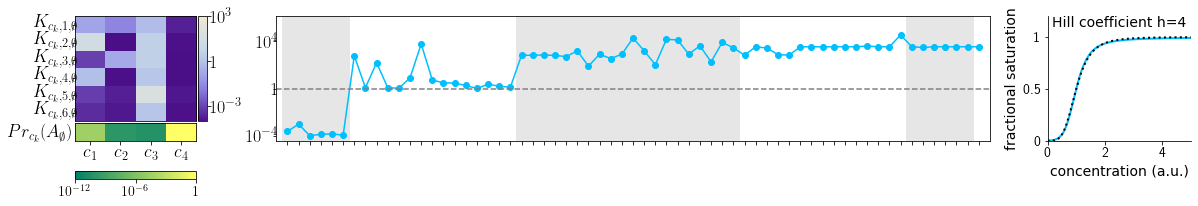

affinities at conformation 1 : [2.27612594e-04 2.69752736e-04 3.00894148e-04 7.45578864e-01
 1.75335706e+00 1.50147137e+02]
affinities at conformation 2 : [ 7.54681084 15.48714834  5.39164841 24.31811344  6.35797796  8.43518374]
affinities at conformation 3 : [8.21406871e-02 2.80542525e-02 1.27405936e-04 7.73748613e+02
 8.31977905e-01 5.25360817e-02]
affinities at conformation 4 : [0.00012917 0.00031129 0.00037791 0.00012566 0.0001392  0.00027779]
[1.00000000e+00 1.00000000e-06 3.67333850e-05 8.86873286e+05]
conformation parameters [1.00000000e-06 3.67333850e-05 8.86873286e+05]
conformation probabilities
[1.12755552e-06 1.12755552e-12 4.14189312e-11 9.99998872e-01]
0.9316151383172117 1.3442055859156439
xhalf 10.090722800631404


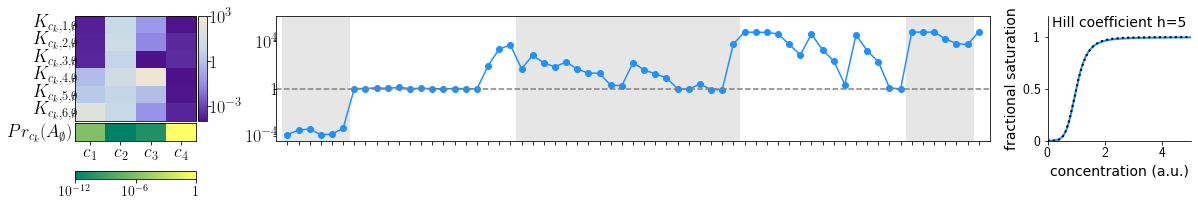

affinities at conformation 1 : [1.90247367e+02 2.02146548e-04 4.09948733e-03 1.19029748e-03
 3.43175224e+01 7.70388727e+02]
affinities at conformation 2 : [0.00052354 0.00328637 0.00083103 0.00339415 0.00680583 0.01068361]
affinities at conformation 3 : [188.76534542 174.77935119 392.43468508 202.57562215 271.19060145
 131.04564222]
affinities at conformation 4 : [6.56790235e+00 1.29401971e-04 5.91618740e+00 1.65843410e-04
 2.08940957e-01 5.29499096e-03]
[1.00000000e+00 8.81116441e+05 5.32336081e-06 3.61993775e-03]
conformation parameters [8.81116441e+05 5.32336081e-06 3.61993775e-03]
conformation probabilities
[1.13492249e-06 9.99998861e-01 6.04160188e-12 4.10834874e-09]
0.930443093497354 1.3470356135959531
xhalf 0.3455087293572257


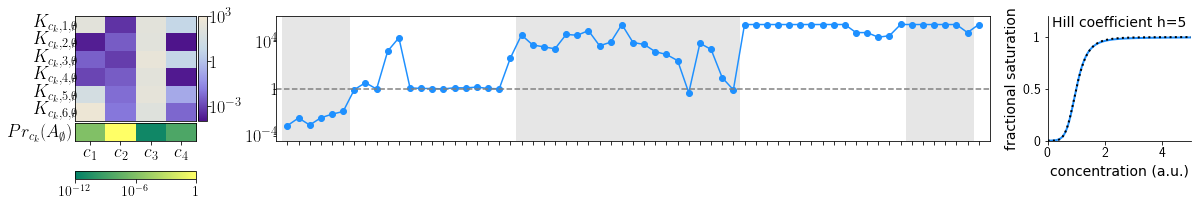

affinities at conformation 1 : [1.00000000e-04 1.76764200e-01 1.30615082e-04 1.26195997e+02
 2.68319274e+00 1.71087251e-01]
affinities at conformation 2 : [9.10985449e-03 1.01228457e+02 2.43678467e-04 1.36399420e-04
 3.34248217e-04 7.49105654e-03]
affinities at conformation 3 : [123.29558401  78.30804897  68.05790759  44.48620341  45.47934808
  77.10783046]
affinities at conformation 4 : [0.00019119 0.00020944 0.003795   0.01045553 0.00010976 0.00010183]
[1.00000000e+00 3.98114986e-01 1.81392885e-06 5.29940186e+05]
conformation parameters [3.98114986e-01 1.81392885e-06 5.29940186e+05]
conformation probabilities
[1.88700044e-06 7.51243152e-07 3.42288453e-12 9.99997362e-01]
0.9417941659026612 1.5052075504647755
xhalf 1.1828689341147252


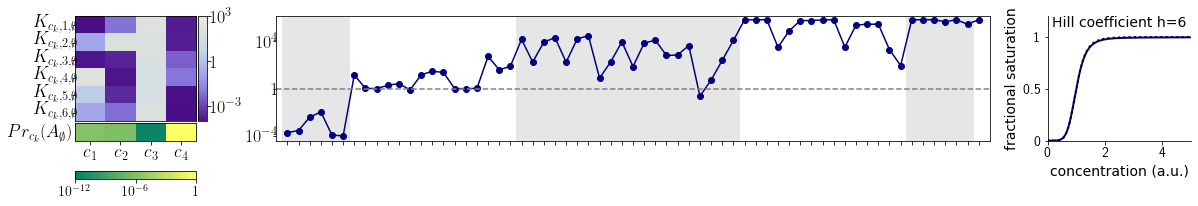

affinities at conformation 1 : [0.00010463 0.00099981 0.0001856  0.00025669 0.0081095  0.0001    ]
affinities at conformation 2 : [0.0001     0.00014131 0.00010684 0.00010259 0.00010207 0.00014124]
affinities at conformation 3 : [7.67109152 6.38501322 8.04922185 5.39831371 8.63965508 7.25918884]
affinities at conformation 4 : [3.69480167e-02 8.27402661e+00 1.89737271e-04 3.21572542e+00
 3.70629800e-02 1.50661829e-04]
[1.00000000e+00 7.81650249e+04 1.09862728e-06 1.11037466e-06]
conformation parameters [7.81650249e+04 1.09862728e-06 1.11037466e-06]
conformation probabilities
[1.27932820e-05 9.99987207e-01 1.40550485e-11 1.42053362e-11]
0.9408969529190733 1.5055187969911767
xhalf 8.916868608073669


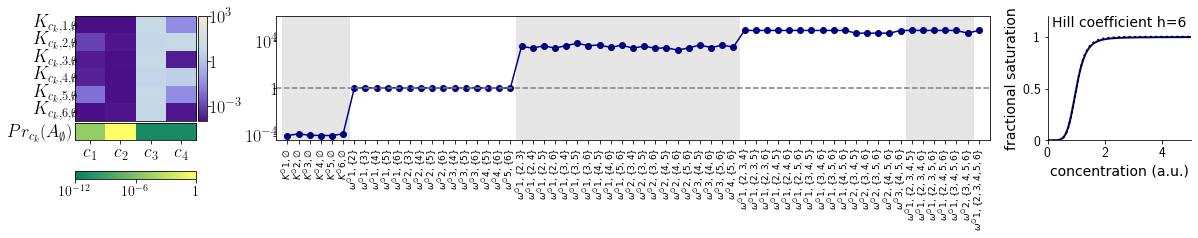

In [48]:
graycolor="#e6e6e6"
for c_,combi in enumerate(list_pars):
    n_sites,parset=combi
    parvalues=gpv(parset)
    names_vals=list(zip(parameters_names_tex,parvalues))
    
    fig=plt.figure(figsize=(20,3))
    gs=gridspec.GridSpec(ncols=100,nrows=17,figure=fig)
    g1=[0,11]
    g2=[18,82]
    g3=[87,100]
    dx1=1
    
    #Plot intrinsic parameters
    
    ax=fig.add_subplot(gs[0:11,g1[0]:g1[1]])
    mat=np.zeros((6,4))
    c=0
    for i in range(0,24,6):
        pars_conf=parset[i:i+6]
        print("affinities at conformation", c+1,":",pars_conf)
        for s,site in enumerate(pars_conf):
            log10s=np.log10(site)
            mat[s,c]=log10s
        c+=1
    im=ax.imshow(mat,cmap=newcmp,aspect="auto",vmin=minp,vmax=maxp)
    
    ax.set_yticks(np.arange(0,6))
    ax.set_yticklabels(yticklabels,useTex=True,fontsize=sizetex)
    ax.yaxis.set_tick_params(pad=-7) 
    ax.set_xticks([])
    #ax.set_xlabel("site")

    #ax.set_xticks(np.arange(4))
    #ax.set_xticklabels([1,2,3,4])
    #ax.set_ylabel("conformation")
    
    cax=fig.add_subplot(gs[0:11,g1[1]:g1[1]+dx1])
    cb=plt.colorbar(im,ax=ax,ticks=[-3,0,3],cax=cax,shrink=0.9)
    #cb.ax.set_yticklabels(["$10^{-4}$","$10^{-2}$","$1$","$10^{2}$","$10^{4}$"],usetex=True)
    cb.ax.set_yticklabels(["$10^{-3}$","$1$","$10^{3}$"],usetex=True,fontsize=sizetex)
    cb.ax.yaxis.set_tick_params(pad=-1) #pady 
    #cb.ax.set_ylabel("$K_{ck,i,S}$",usetex=True,fontsize=sizetex)
    ax=fig.add_subplot(gs[11:13,g1[0]:g1[1]])
    pars_conf=np.concatenate((np.array([1]),parset[-3:]))
    print(pars_conf)
    print("conformation parameters", parset[-3:])
    mat_conf=pars_conf/np.sum(pars_conf) #probability empty conf
    print("conformation probabilities")
    print(mat_conf)
    #print("min-max",mat_conf.min(),mat_conf.max())
    
    imc=ax.imshow(np.log10(mat_conf.reshape(1,4)),aspect="auto",cmap=plt.cm.summer,vmin=-12,vmax=0)
    ax.set_ylabel("$Pr_{c_k}(A_\emptyset)$",usetex=True,fontsize=sizetex,rotation=0,labelpad=35,y=-0.25)
    cax=fig.add_subplot(gs[16,g1[0]:g1[1]])
    #ticks=np.linspace(np.log10(np.min(mat_conf)),np.log10(np.max(mat_conf)),3)
    cb=plt.colorbar(imc,orientation="horizontal",cax=cax,ticks=[-12,-6,0])#ticks)
    #cb.ax.set_xticks(ticks)
    specificvals=False
    if specificvals:
        values=np.linspace(np.min(mat_conf),np.max(mat_conf),3)
        cbarlabs=[]
        for value in values:

            stringv=np.format_float_scientific(value)
            base,exp=stringv.split("e")

            number=r"$%2.2f \times 10^{%s}$"%(float(base),exp)
            cbarlabs.append(number)
        #cb.ax.set_xticklabels(["$%2.1e$"%x for x in ],rotation=90,usetex=True)
        print("Prck values", values)
        cb.ax.set_xticklabels(cbarlabs,usetex=True)
    else:
        cb.ax.set_xticks([-12,-6,0])
        cbarlabs=[r"$10^{-12}$",r"$10^{-6}$",r"$1$"]
        
        cb.ax.set_xticklabels(cbarlabs,usetex=True)
        
        
    #cb.ax.set_xlabel("$Pr_c_k{(A^\emptyset)}$",usetex=True,fontsize=sizetex)
    ax.set_xticks(range(4))
    ax.set_xticklabels(xticklabels,usetex=True,fontsize=sizetex)
    ax.set_yticks([])
    
    
    #plot effective parameters
    ax = fig.add_subplot(gs[0:-4, g2[0]:g2[1]])

    parvalues_sorted=np.array(parvalues)[argsort]
    values=[]
    #print("effective parameters")
    for p,par in enumerate(parvalues_sorted):
        log10p=np.log10(par)
        values.append(log10p)
        #print(par,end=",")
    #print("")
    
    ax.plot(range(len(values)),values,color=colors[c_],marker="o")
    ax.set_xticks(np.arange(len(parvalues)))
    ax.set_xlim(-1,len(parvalues))
    if c_==len(list_pars)-1:
        lab=ax.set_xticklabels(np.array(parameters_names_tex)[argsort],rotation=90,fontsize=9)
    else:
        ax.set_xticklabels([])
    ax.axvspan(-0.5,5.5,color=graycolor)
    ax.axvspan(20.5,40.5,color=graycolor)
    ax.axvspan(55.5,61.5,color=graycolor)
    #ax.set_ylabel("log$_{10}$(effective parameter)")
    #ax.set_ylabel("effective parameter")
    ax.set_yticks([-4,0,4])
    ax.set_yticklabels(["$10^{-4}$","$1\:$","$10^{4}$"],usetex=True,fontsize=sizetex)
    ax.yaxis.set_tick_params(pad=-6)
    ax.axhline(y=0,color="grey",linestyle="--")
    ax.set_ylim(-4.4,6.1)
   
    #Plot hill fit

    ax=fig.add_subplot(gs[0:-4,g3[0]:])

    ps,stp,x05=psfunc(parset)
    print(ps,stp)
    xvals=np.logspace(-3,np.log10(5),1000)

    values=[GRFfunc(parset,x) for x in xvals]
    values=np.array(values)

    print("xhalf",x05)
    values_norm=[GRFfunc(parset,x*x05) for x in xvals] #compute normalised GRF
    ax.plot(xvals,values_norm,color=colors[c_],label="allosteric model",linestyle="-",linewidth=2)

    ax.plot(xvals,utils_matchHill.hill(n_sites,xvals),color="k",label="Hill n=%d"%n_sites,linestyle=":",linewidth=2)
    ax.set_xlabel("concentration (a.u.)")
    ax.set_ylabel("fractional saturation")
    #ax.legend(bbox_to_anchor=(1,1))
    
    ax.set_xticks([0,2,4])
    ax.set_xlim(0,5)
    ax.set_ylim(0,1.2)
    ax.text(2.5,1.1,"Hill coefficient h=%d"%n_sites,color="k",fontsize=fontsize,horizontalalignment='center')
    ax.set_xticklabels([0,2,4],usetex=True)
    ax.set_yticklabels([0,0.5,1],usetex=True)
    #ax.set_title("Hill n=%d"%n_sites,color="gray",fontsize=fontsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #plt.tight_layout()
    #plt.savefig("small_n%d_%d.pdf"%(n_sites,c_),bbox_inches="tight")
    plt.savefig("./plots/small_n%d_%d.svg"%(n_sites,c_),bbox_inches="tight")
    plt.show()